In [3]:
%run "C:/Users/alibs/NeuroFieldzDev Dropbox/Ali DrBox/Work/Research/Neurotechnology/Python/Jupyter/Functions/amd_ph2_functions.py"

# standard lib
import pickle as pk
import os, pathlib 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from heapq import nlargest
import statistics as st
from scipy.signal import find_peaks
import warnings
from sklearn.mixture import GaussianMixture as GMM

# neurofieldz
import neurodot_data
from neurodot_data import configurator

In [2]:
# ---------------------------------------------- #
# 1. Defining the analysis parameters and paths: #
# ---------------------------------------------- #

# config and overload settings:
CONFIG_PATH_dar = r"C:\Users\alibs\NeuroFieldzDev Dropbox\amd_ph2_all\config_DAR_V3.2.py" # config_DAR_V3.1.py # config_DAR_V3.2.py
config_dar = configurator.load_abspath_config(CONFIG_PATH_dar)
print("\n".join(name for name in dir(config_dar) if not name.startswith("__")))

modpath = "{}.visualization".format(config_dar.VisualizationSettings.PARADIGM)
mod = configurator.chain_import(modpath)

config_dar.AnalysisSettings.DEBUG_PLOTS = False
config_dar.AnalysisSettings.DEBUG_PLOTS_INTERACTIVE = False
config_dar.AnalysisSettings.PLOT_INTERACTIVE_TIMEDOMAIN = False

AnalysisSettings
CleanupSettings
ComparisonSettings
VisualizationSettings
local_dir
modpath


In [3]:
# Reading subject_info:
datasets_path       = r"C:\Users\alibs\NeuroFieldzDev Dropbox\amd_ph2_all\datasets\MES-FF-DAR V3" # MES-FF-DAR V3 # DAR V3
subject_info_path   = r"C:\Users\alibs\NeuroFieldzDev Dropbox\amd_ph2_all\subject_info.csv"
subject_info_full   = pd.read_csv(subject_info_path, sep=',', index_col=None)
test_paradigm       = 'MES, FF, DAR v3' # 'MES, FF, DAR v3' # DAR v3
subject_info_custom = subject_info_full.loc[(subject_info_full['tests']==test_paradigm) & (subject_info_full['analysis_code']==1)].reset_index(drop=True)

Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.


Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.


Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.


Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.


Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.


Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.


Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.


Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.


Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.


Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.


Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.


Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.


Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.


Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.


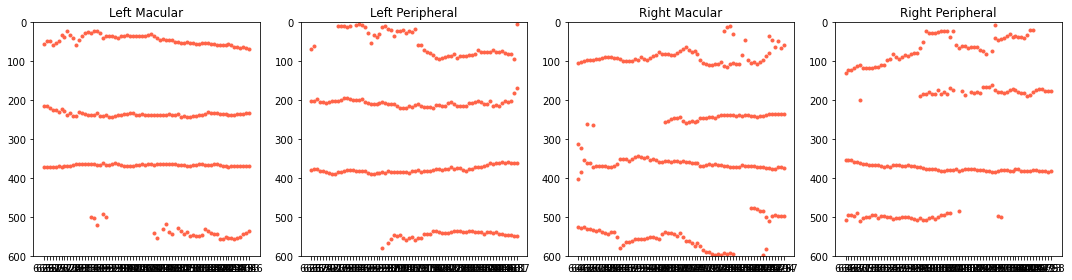

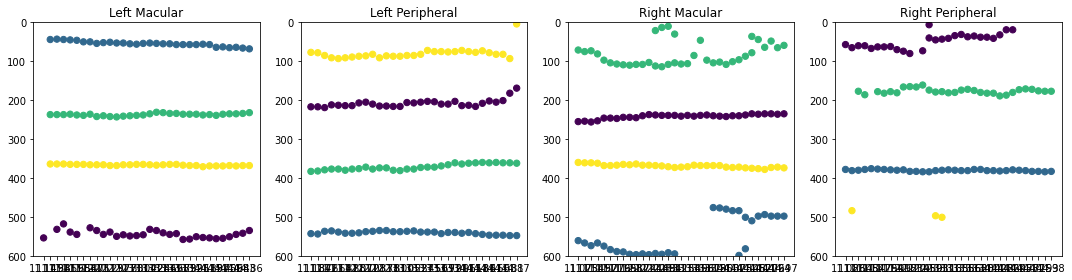

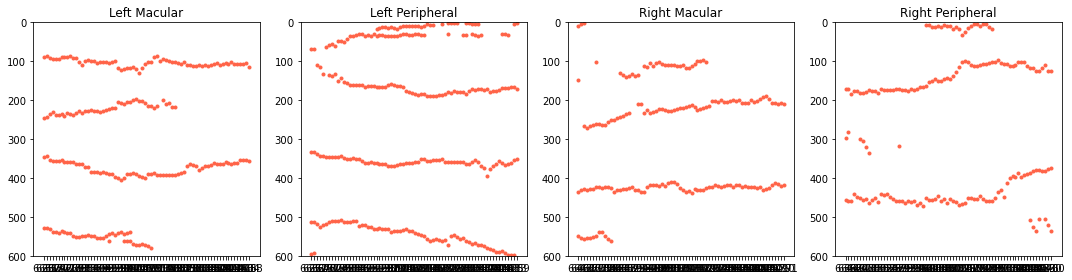

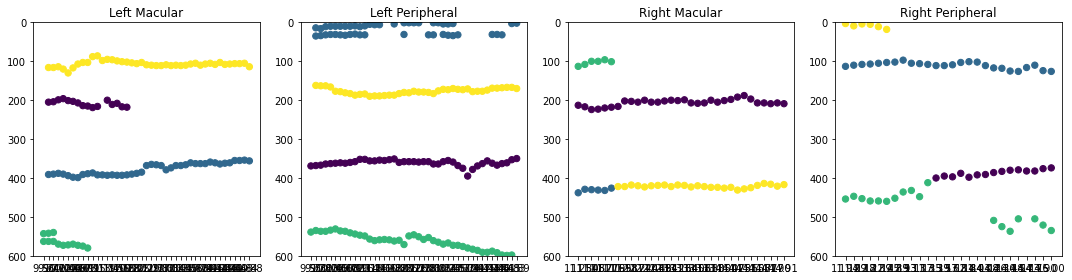

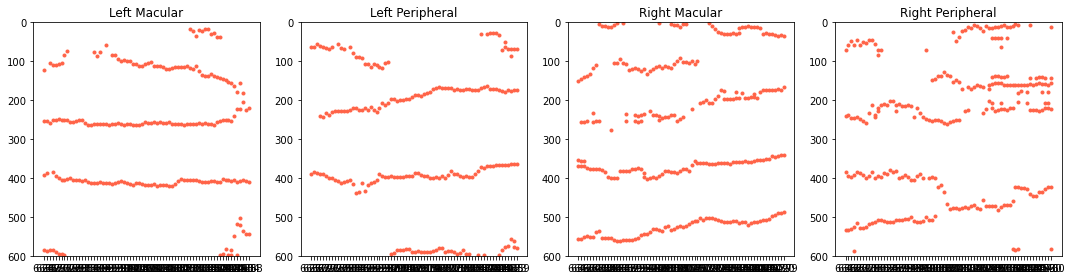

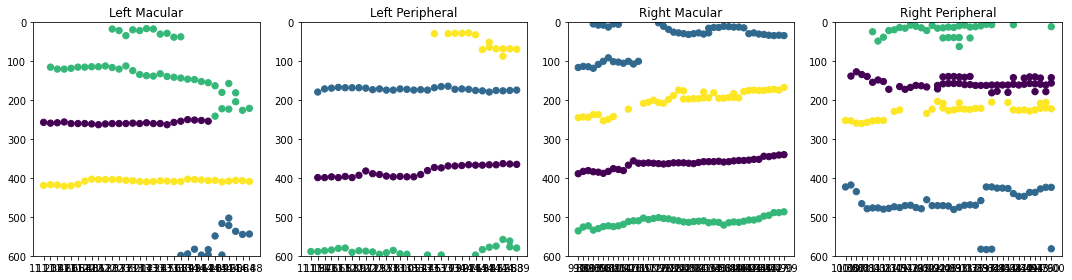

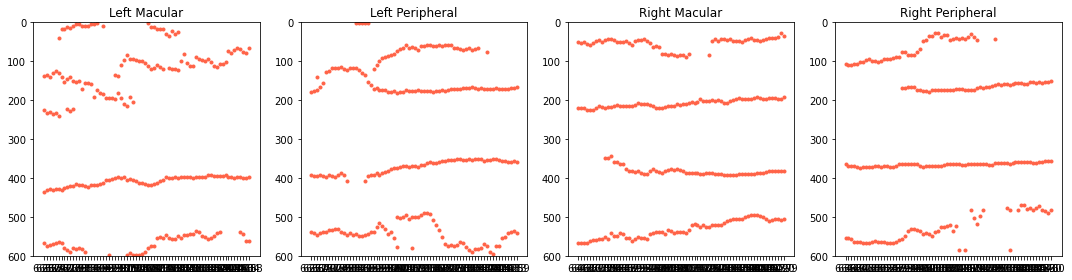

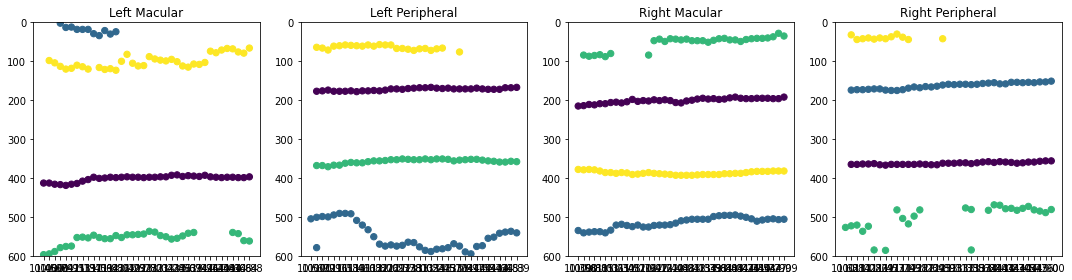

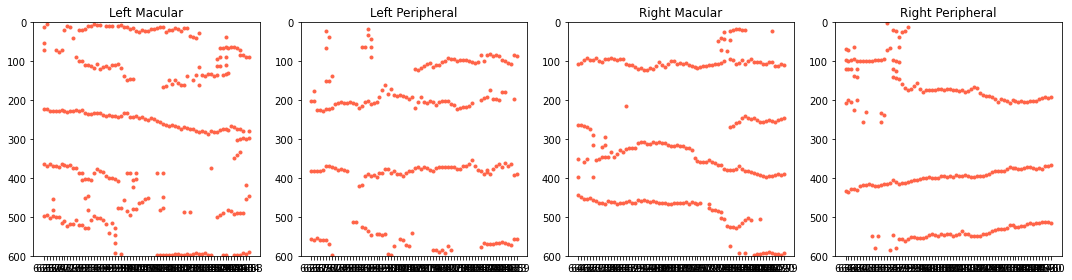

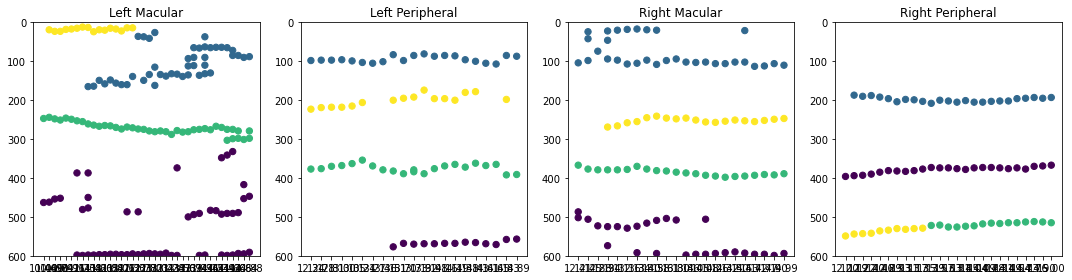

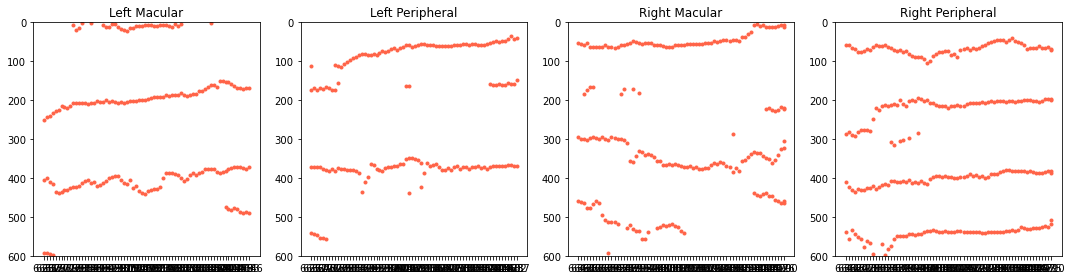

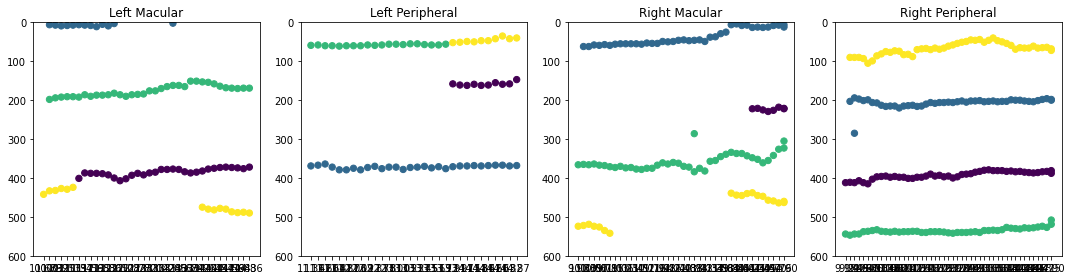

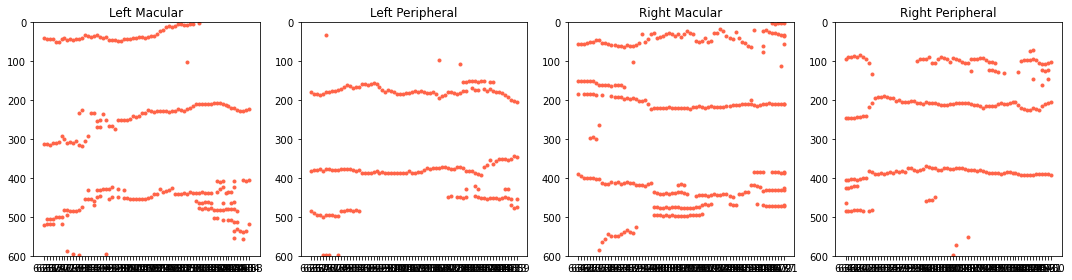

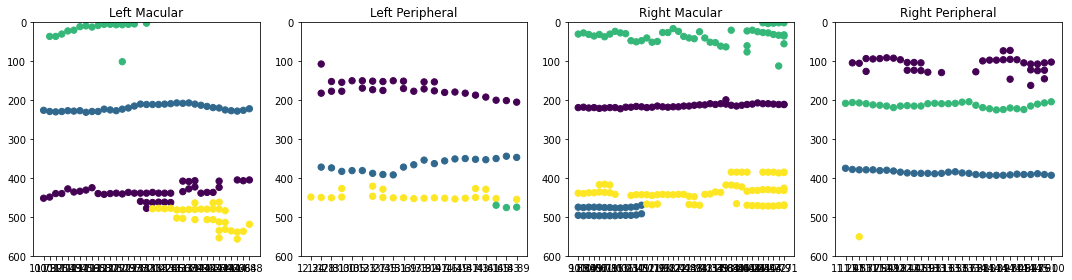

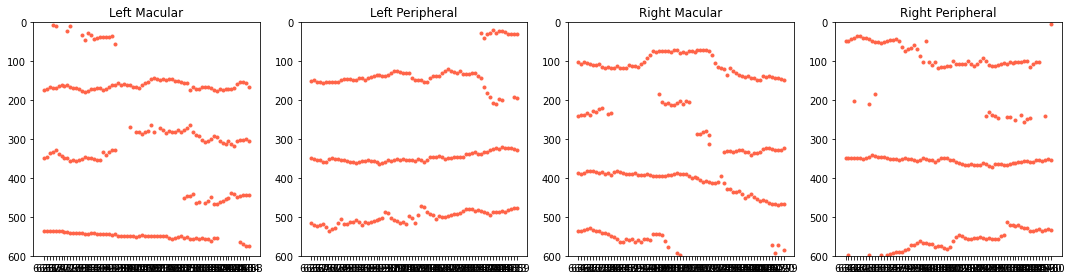

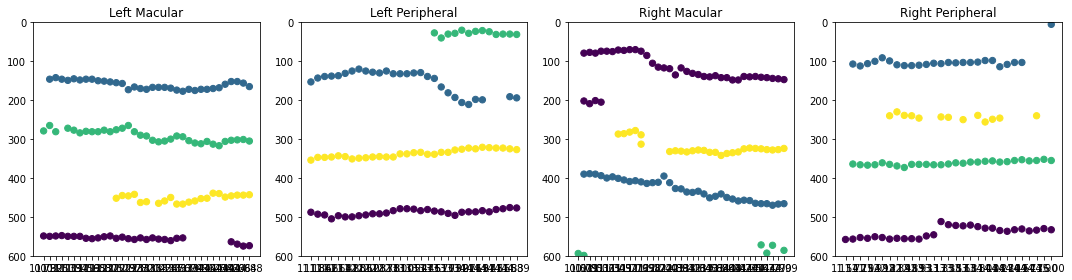

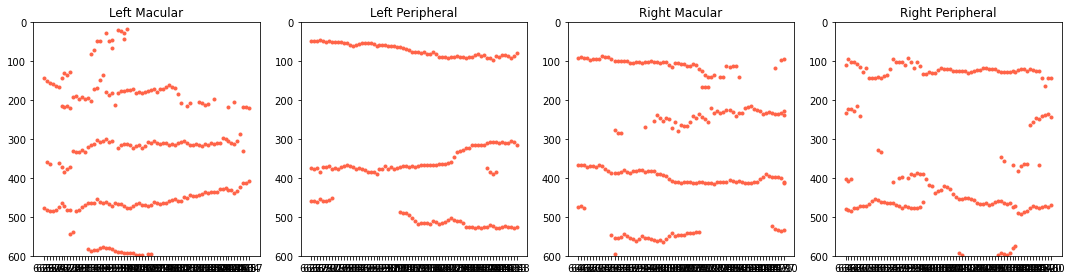

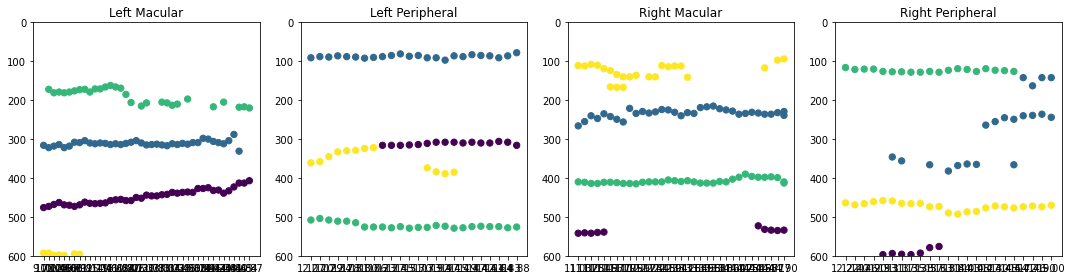

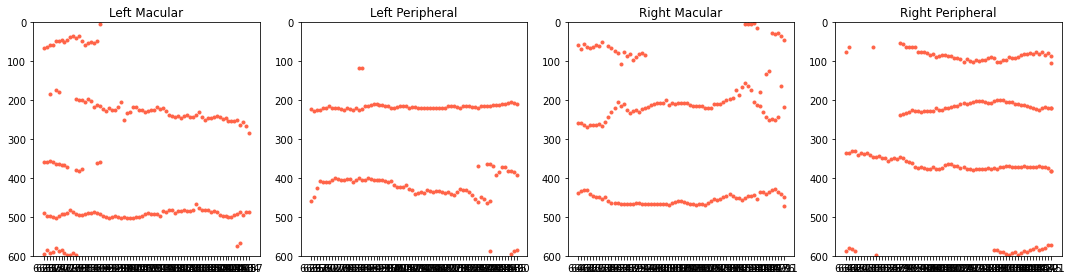

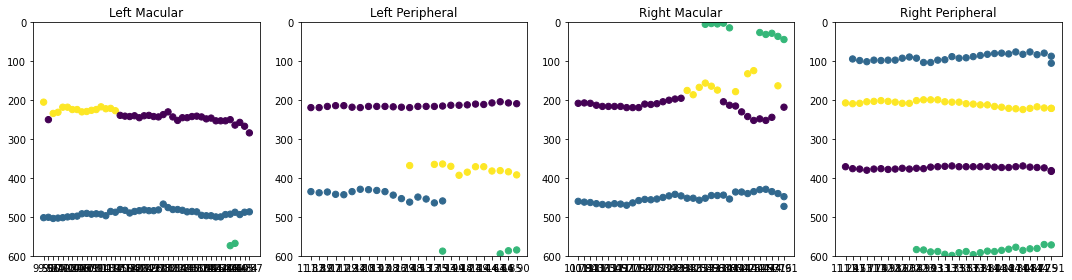

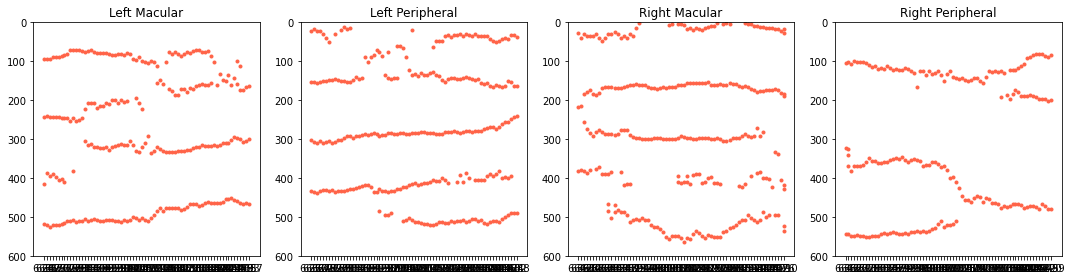

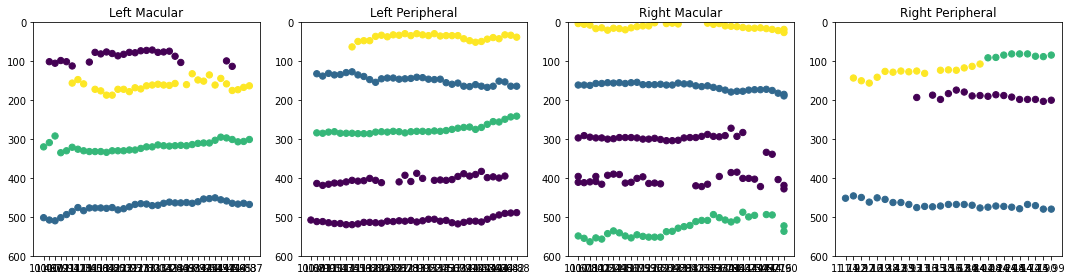

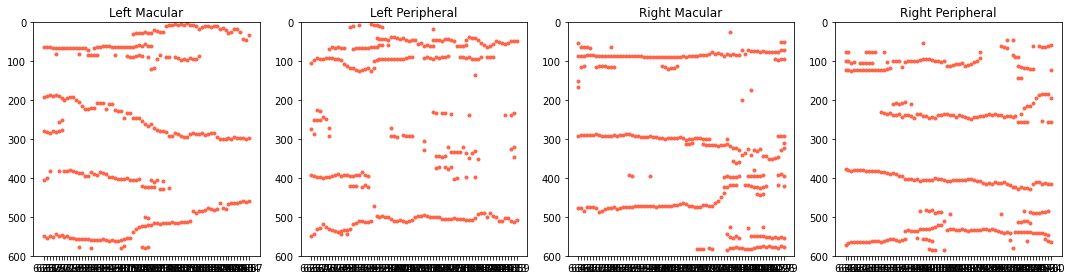

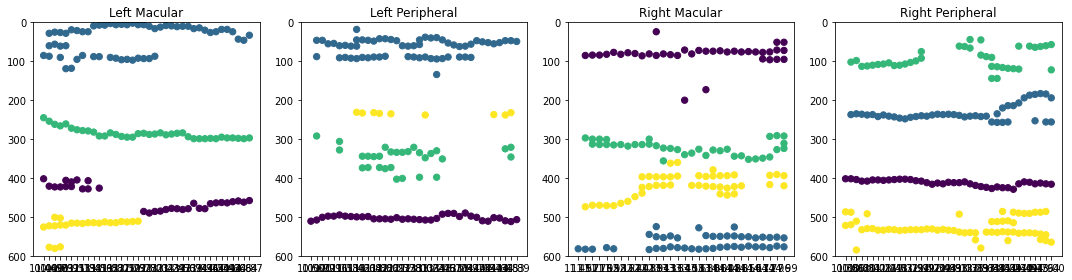

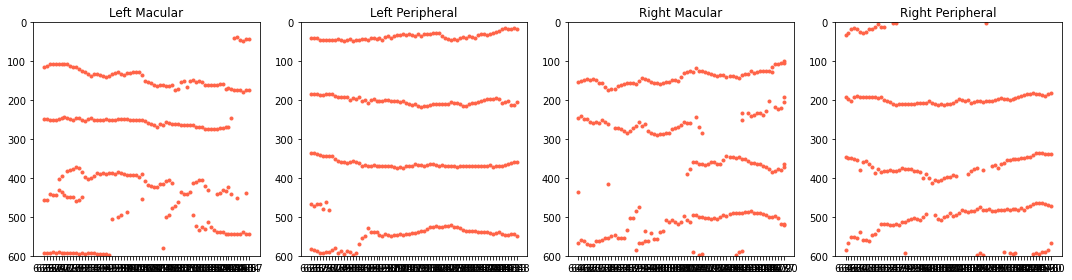

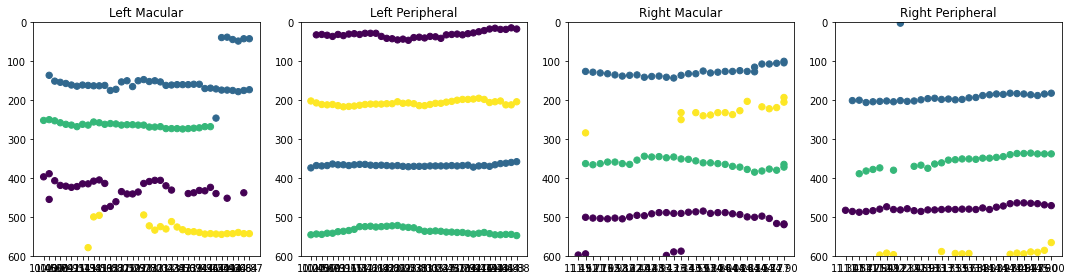

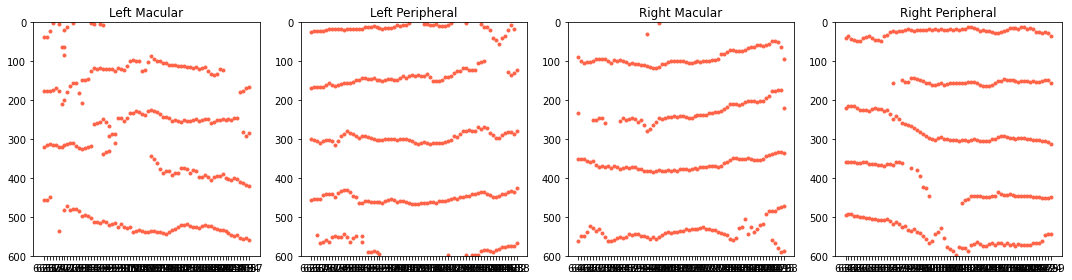

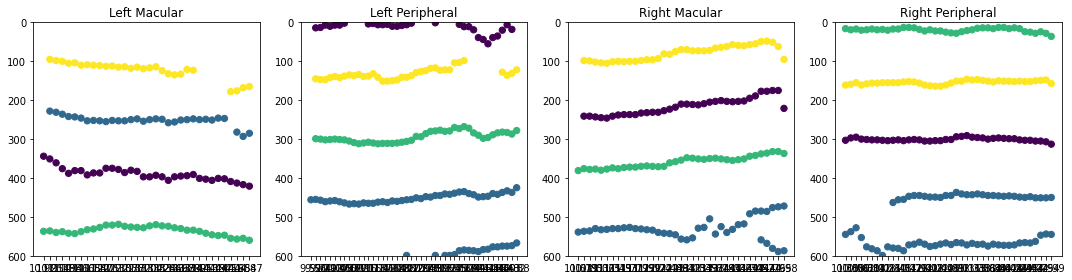

In [4]:
# Visualization parameters:
SIGNAL_KEYS = ['EEG','Vavg_input']
WINDOW_SIZE = 100#121#61
WINDOW_STEP = 2#5#7#3

# parameters:
resp_start   = 200 # translates to 0 [ms]
resp_end     = 801 # translates to 601 [ms]
plots_path   = r"C:\Users\alibs\NeuroFieldzDev Dropbox\amd_ph2_all"
results_path = r"C:\Users\alibs\NeuroFieldzDev Dropbox\amd_ph2_all"
score_method = 'elevated-v2'

# Variables:
all_data = pd.DataFrame(columns=['subject_id', 'l_mac_score', 'l_mac_response_center', 'l_per_score', 'l_per_response_center', 'r_mac_score', 'r_mac_response_center',
                                 'r_per_score', 'r_per_response_center', 'max_val', 'score_method','l_va_dim', 'l_va_bright', 'l_correction', 'r_va_dim', 'r_va_bright', 
                                 'r_correction', 'category', 'tests', 'cat_code', 'test_location', 'folder'],
                        index=range(subject_info_custom.shape[0]))
all_data[['subject_id', 'l_va_dim', 'l_va_bright', 'l_correction', 'r_va_dim', 'r_va_bright', 'r_correction', 'category', 'tests', 'cat_code', 'test_location', 'folder']]=subject_info_custom[['subject_id', 'l_va_dim', 'l_va_bright', 'l_correction', 'r_va_dim', 'r_va_bright', 'r_correction', 'category', 'tests', 'cat_code', 'test_location', 'folder']]
all_data['score_method'] = score_method
#all_data = all_data.iloc[0:2, :]

for i in subject_info_custom.index:
    # I. Visualization Code:
    session_path = os.path.join(datasets_path, subject_info_custom.loc[i, 'folder'])
    VP = mod.DataProcess(session_path=str(session_path),config=config_dar)
    # Run the processing code
    # NOTE that the file session_path/mfvep/measurements.pkl is needed
    VP.load_measurements()
    VP.load_viz_params()
    VP.recompute_measurement_groups()
    plt.close() # To avoid the spectra plot
    
    # Specify and load the visualization module and DAR_plotter module from DATVEP2 paradigm plug-in
    modpath = "{}.{}_plotter".format(config_dar.VisualizationSettings.PARADIGM,config_dar.VisualizationSettings.PLOTTER_TYPE)
    plotter_mod = configurator.chain_import(modpath)
    plotter = plotter_mod.Plotter(VP=VP)
    data = {}
    for meas_name, meas_group in VP.M['meas_groups'].items():
        data[meas_name] = plotter.get_window_filtered_signal_trials(meas_group,SIGNAL_KEYS,window_size=WINDOW_SIZE,window_step=WINDOW_STEP)
    warnings.filterwarnings('ignore') # To avoid the warnings from Craig's code
    
    
    # II. Preparing the dataset for functions:
    # Data:
    all_vs = [0, 0, 0, 0]
    data_labels = ['left-macular', 'left-peripheral', 'right-macular', 'right-peripheral']
    for j in range(4):
        all_vs[j] = pd.DataFrame(data[data_labels[j]]).iloc[resp_start:resp_end, :]
    
    # method: elevated (Bringing up all responses (Taking into account the deep to peak distance)
    min_val = abs(min(all_vs[0].min().min(),
                      all_vs[1].min().min(),
                      all_vs[2].min().min(),
                      all_vs[3].min().min()))
    for k in range(4):
        all_vs[k] = all_vs[k] + min_val
        
    
    # III.I. Finding the responses and calculating the scores:
    peaks = find_trial_peaks(all_vs=all_vs, plot_path=plots_path, subject_id=all_data.loc[i, ['subject_id']][0], plot_size=(15,4), show_plots=True)
    centers = find_components(peak_loc=peaks, plot_path=plots_path, subject_id=all_data.loc[i, ['subject_id']][0], n_lm=4, n_lp=4, n_rm=4, n_rp=4,
                          cl_search='half', plot_size=(15,4), show_plots=True)
    response_info, davep_scores, max_val = find_davep_score(all_vs=all_vs, centers=centers,
                                                        resp_window_half=75, cs_start=290, cs_end=600,
                                                        method=score_method) # 'normal'

    # III.II. Heatmap and wireframe plots:
    plot_heatmap(all_vs=all_vs, response_info=response_info, davep_scores=davep_scores,
                 max_val=max_val, plot_label=all_data.loc[i, ['folder']][0], condition=all_data.loc[i, ['category']][0],
                 plot_path=plots_path, subject_id=all_data.loc[i, ['subject_id']][0], score_method=score_method, sep=10, show_plots=False)
    plot_wireframe(all_vs=all_vs, response_info=response_info, davep_scores=davep_scores,
             max_val=max_val, plot_label=all_data.loc[i, ['folder']][0], condition=all_data.loc[i, ['category']][0],
             plot_path=plots_path, subject_id=all_data.loc[i, ['subject_id']][0], score_method=score_method, plot_angles=[70, 30], show_plots=False)
    
    # IV. Making the results dataframe and saving it:
    all_data.loc[i, ['l_mac_score', 'l_per_score', 'r_mac_score', 'r_per_score']] = davep_scores
    all_data.loc[i, ['l_mac_response_center', 'l_per_response_center', 'r_mac_response_center', 'r_per_response_center']] = [response_info[0,0], response_info[1,0], response_info[2,0], response_info[3,0]]
    all_data.loc[i, ['max_val']] = max_val
                                                                                            
    all_data.to_csv(os.path.join(results_path, 'all_data_w_scores_3.2.csv'), index=False)

# Analysis:

### Creating the DataFrames:

In [5]:
# Combining v 3.1 and v 3.2 data and saving them to all_data_w_scores_combined.csv:
all_data_combined = pd.read_csv(r"C:\Users\alibs\NeuroFieldzDev Dropbox\amd_ph2_all\all_data_w_scores_3.1.csv", sep=',', index_col=None)
all_data_new      = pd.read_csv(r"C:\Users\alibs\NeuroFieldzDev Dropbox\amd_ph2_all\all_data_w_scores_3.2.csv", sep=',', index_col=None)
all_data_combined = all_data_combined.append(all_data_new, ignore_index=True)
all_data_combined.to_csv(os.path.join(results_path, 'all_data_w_scores_combined.csv'), index=False)

NameError: name 'results_path' is not defined

In [14]:
# Merging left and right info:
all_data_merged = pd.DataFrame({'subject_id': list(all_data_combined['subject_id'].append(all_data_combined['subject_id'])),
                                'mac_score': list(all_data_combined['l_mac_score'].append(all_data_combined['r_mac_score'])),
                                'per_score': list(all_data_combined['l_per_score'].append(all_data_combined['r_per_score'])),
                                'mac_response_center': list(all_data_combined['l_mac_response_center'].append(all_data_combined['r_mac_response_center'])),
                                'per_response_center': list(all_data_combined['l_per_response_center'].append(all_data_combined['r_per_response_center'])),
                                'va_dim': list(all_data_combined['l_va_dim'].append(all_data_combined['r_va_dim'])),
                                'va_bright': list(all_data_combined['l_va_bright'].append(all_data_combined['r_va_bright'])),
                                'correction': list(all_data_combined['l_correction'].append(all_data_combined['r_correction'])),
                                'category': list(all_data_combined['category'].append(all_data_combined['category'])),
                                'tests': list(all_data_combined['tests'].append(all_data_combined['tests'])),
                                'cat_code': list(all_data_combined['cat_code'].append(all_data_combined['cat_code'])),
                                'test_location': list(all_data_combined['test_location'].append(all_data_combined['test_location'])),
                                'folder': list(all_data_combined['folder'].append(all_data_combined['folder']))
                               }, )
all_data_merged.to_csv(os.path.join(results_path, 'all_data_w_scores_merged.csv'), index=False)

### Reading and Using the DataFrames for analysis:

In [6]:
# Reading the data:
results_path = r"C:\Users\alibs\NeuroFieldzDev Dropbox\amd_ph2_all"
all_data_combined = pd.read_csv(os.path.join(results_path, 'all_data_w_scores_combined.csv'), index_col=None)
all_data_merged   = pd.read_csv(os.path.join(results_path, 'all_data_w_scores_merged.csv'), index_col=None)

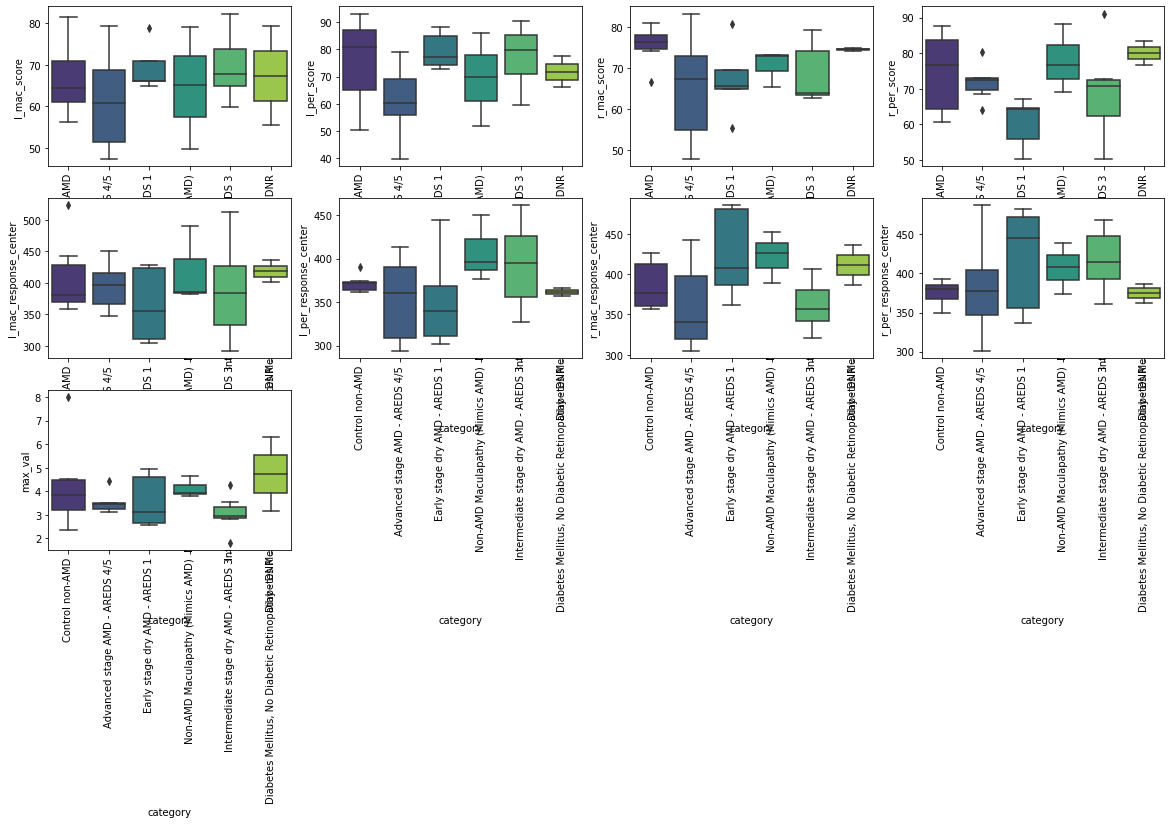

In [18]:
fig = plt.figure(figsize=(20, 10))
feats = ['l_mac_score', 'l_per_score', 'r_mac_score', 'r_per_score',
         'l_mac_response_center', 'l_per_response_center','r_mac_response_center', 'r_per_response_center',
         'max_val']

for i in range(len(feats)):
    fig.add_subplot(3, 4, i+1)
    ax = sns.boxplot(x='category', y=feats[i], data=all_data_combined[['l_mac_score', 'l_mac_response_center',
       'l_per_score', 'l_per_response_center', 'r_mac_score',
       'r_mac_response_center', 'r_per_score', 'r_per_response_center',
       'max_val', 'category']], palette='viridis')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

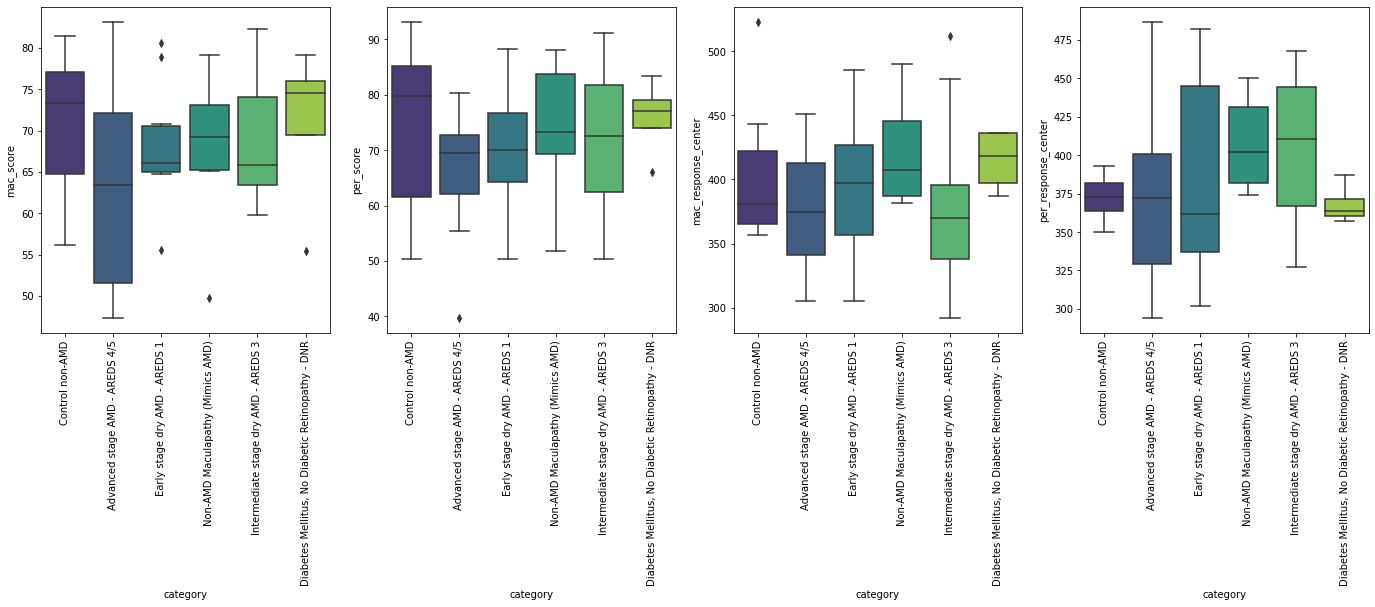

In [19]:
#import seaborn as sns
fig = plt.figure(figsize=(30, 6))
feats = ['mac_score', 'per_score', 'mac_response_center', 'per_response_center']


for i in range(len(feats)):
    fig.add_subplot(1, 5, i+1)
    ax = sns.boxplot(x='category', y=feats[i], data=all_data_merged[['mac_score', 'mac_response_center',
       'per_score', 'per_response_center',
       'category']], palette='viridis')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

### Clustering Kmeans or GMM:

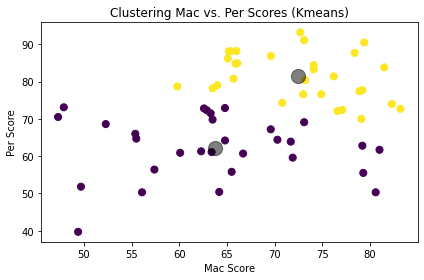

In [10]:
# Clustering the mac vs. per scores:
plt.figure(figsize=(6,4))
n_cluster = 2

X=np.array(pd.concat([all_data_merged.loc[:, 'mac_score'], all_data_merged.loc[:, 'per_score']], axis=1))
kmeans = KMeans(n_clusters=n_cluster)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plotting the result of the clustering:
#plt.subplot(1,4,1)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Clustering Mac vs. Per Scores (Kmeans)')
plt.xlabel('Mac Score')
plt.ylabel('Per Score')
plt.tight_layout()

In [27]:
y_kmeans

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1])

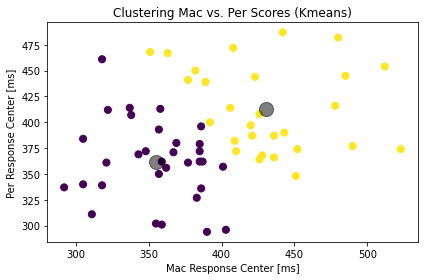

In [9]:
# Clustering the mac vs. per scores:
plt.figure(figsize=(6,4))
n_cluster = 2

X=np.array(pd.concat([all_data_merged.loc[:, 'mac_response_center'], all_data_merged.loc[:, 'per_response_center']], axis=1))
kmeans = KMeans(n_clusters=n_cluster)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plotting the result of the clustering:
#plt.subplot(1,4,1)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Clustering Mac vs. Per Scores (Kmeans)')
plt.xlabel('Mac Response Center [ms]')
plt.ylabel('Per Response Center [ms]')
plt.tight_layout()

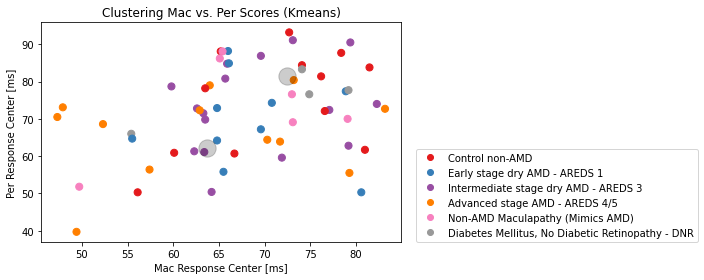

In [44]:
plt.figure(figsize=(10,4))
cats = ['Control non-AMD', 'Early stage dry AMD - AREDS 1', 'Intermediate stage dry AMD - AREDS 3', 'Advanced stage AMD - AREDS 4/5', 'Non-AMD Maculapathy (Mimics AMD)', 'Diabetes Mellitus, No Diabetic Retinopathy - DNR']
scatter = plt.scatter(X[:, 0], X[:, 1], c=all_data_merged.loc[:, 'cat_code'], s=50, cmap='Set1')#, labels=list(all_data_merged.loc[:, 'cat_code']))
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.2)
plt.title('Clustering Mac vs. Per Scores (Kmeans)')
plt.xlabel('Mac Response Center [ms]')
plt.ylabel('Per Response Center [ms]')
plt.legend(handles=scatter.legend_elements()[0], labels=cats, loc=(1.04,0))
plt.tight_layout()

In [18]:
scatter.legend_elements()[0]

In [34]:
cats = ['Control non-AMD', 'Early stage dry AMD - AREDS 1', 'Intermediate stage dry AMD - AREDS 3', 'Advanced stage AMD - AREDS 4/5', 'Non-AMD Maculapathy (Mimics AMD)', 'Diabetes Mellitus, No Diabetic Retinopathy - DNR']

['Advanced stage AMD - AREDS 4/5',
 'Control non-AMD',
 'Diabetes Mellitus, No Diabetic Retinopathy - DNR',
 'Early stage dry AMD - AREDS 1',
 'Intermediate stage dry AMD - AREDS 3',
 'Non-AMD Maculapathy (Mimics AMD)']

In [40]:
all_data_merged.loc[:, 'category']

0                                      Control non-AMD
1                       Advanced stage AMD - AREDS 4/5
2                                      Control non-AMD
3                        Early stage dry AMD - AREDS 1
4                     Non-AMD Maculapathy (Mimics AMD)
5                 Intermediate stage dry AMD - AREDS 3
6                       Advanced stage AMD - AREDS 4/5
7                       Advanced stage AMD - AREDS 4/5
8                 Intermediate stage dry AMD - AREDS 3
9                 Intermediate stage dry AMD - AREDS 3
10                Intermediate stage dry AMD - AREDS 3
11                Intermediate stage dry AMD - AREDS 3
12                       Early stage dry AMD - AREDS 1
13                       Early stage dry AMD - AREDS 1
14                    Non-AMD Maculapathy (Mimics AMD)
15                      Advanced stage AMD - AREDS 4/5
16                                     Control non-AMD
17                                     Control non-AMD
18        